In [901]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import time
import math

In [902]:
crime = pd.read_csv("datalab.csv", index_col = 0)

In [903]:
print(crime.head())

  FechaInicio                                           Delito  \
1  20/12/2019             ROBO A CASA HABITACION SIN VIOLENCIA   
2  20/12/2019                LESIONES INTENCIONALES POR GOLPES   
3  20/12/2019                 DESAPARICION FORZADA DE PERSONAS   
4  20/12/2019  DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL   
5  20/12/2019                               VIOLENCIA FAMILIAR   

                Categoria       Sexo  Edad        CalidadJuridica  FechaHecho  \
1  DELITO DE BAJO IMPACTO  Masculino   NaN  VICTIMA Y DENUNCIANTE  19/12/2019   
2  DELITO DE BAJO IMPACTO  Masculino   NaN  VICTIMA Y DENUNCIANTE  19/12/2019   
3  DELITO DE BAJO IMPACTO  Masculino  36.0                VICTIMA  19/12/2019   
4  DELITO DE BAJO IMPACTO   Femenino   NaN  VICTIMA Y DENUNCIANTE  01/12/2019   
5  DELITO DE BAJO IMPACTO   Femenino  24.0  VICTIMA Y DENUNCIANTE  20/12/2019   

  HoraHecho HoraInicio                      geopoint         AlcaldiaHechos  \
1  16:00:00   03:26:00      19.367423

In [904]:
#Filtering out non-high impact crimes on the area
delitos = crime.Categoria.unique()
print(delitos)
delitos_ai = ['ROBO A REPARTIDOR CON Y SIN VIOLENCIA', 'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA', 'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA', 'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO','HOMICIDIO DOLOSO', 'ROBO A NEGOCIO CON VIOLENCIA','VIOLACIÓN', 'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA', 'ROBO A CASA HABITACIÓN CON VIOLENCIA', 'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA', 'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA', 'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA']


['DELITO DE BAJO IMPACTO' 'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA'
 'HECHO NO DELICTIVO'
 'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA'
 'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA'
 'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA'
 'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA' 'VIOLACIÓN'
 'ROBO A REPARTIDOR CON Y SIN VIOLENCIA' 'HOMICIDIO DOLOSO'
 'ROBO A NEGOCIO CON VIOLENCIA'
 'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO'
 'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA'
 'ROBO A CASA HABITACIÓN CON VIOLENCIA'
 'ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA' 'SECUESTRO']


In [905]:
crime = crime[crime['Categoria'].isin(delitos_ai)].sample(600)
print(crime)

       FechaInicio                                             Delito  \
146618  08/01/2019     ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA   
58389   03/05/2019     ROBO A PASAJERO A BORDO DE METRO CON VIOLENCIA   
49383   02/04/2019     ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA   
106495  18/04/2019                       ROBO A NEGOCIO CON VIOLENCIA   
193580  21/03/2019  ROBO A PASAJERO A BORDO DE PESERO COLECTIVO CO...   
...            ...                                                ...   
27105   05/11/2019                        HOMICIDIO POR ARMA DE FUEGO   
93724   06/08/2019  ROBO A PASAJERO A BORDO DE PESERO COLECTIVO CO...   
36197   15/07/2019  ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...   
108291  21/02/2019                       ROBO A NEGOCIO CON VIOLENCIA   
111392  09/03/2019     ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA   

                                                Categoria       Sexo  Edad  \
146618  ROBO A PASAJERO A BORDO DEL METRO CON

In [906]:
crime_geopoints = crime["geopoint"]

In [907]:
#Getting location data
crime_geopoints = crime_geopoints.str.split(pat=",", n=2, expand=True)
crime_geopoints.columns = ['lat', 'lon']
crime_geopoints = crime_geopoints.astype(float)
print(crime_geopoints)

              lat        lon
146618  19.443743 -99.139096
58389   19.490578 -99.195341
49383   19.295720 -99.065971
106495  19.348275 -99.011336
193580  19.349861 -99.017821
...           ...        ...
27105   19.290606 -99.111975
93724   19.373682 -99.111989
36197   19.454103 -99.103952
108291  19.396126 -99.080936
111392  19.437515 -99.085796

[600 rows x 2 columns]


In [908]:
#Setup of bounds for plotting
margin  = np.array([-70e-4,70e-4,-70e-4,70e-4])
crime_data = np.array([crime_geopoints.lat, crime_geopoints.lon]).reshape(n_crime*2)
bounds = np.array([crime_geopoints.lat.min(),crime_geopoints.lat.max(),crime_geopoints.lon.min(),crime_geopoints.lon.max()])
bounds += margin
bounds = bounds.round(3)
print(bounds)


[ 19.194  19.575 -99.289 -98.969]


(19.194, 19.575)

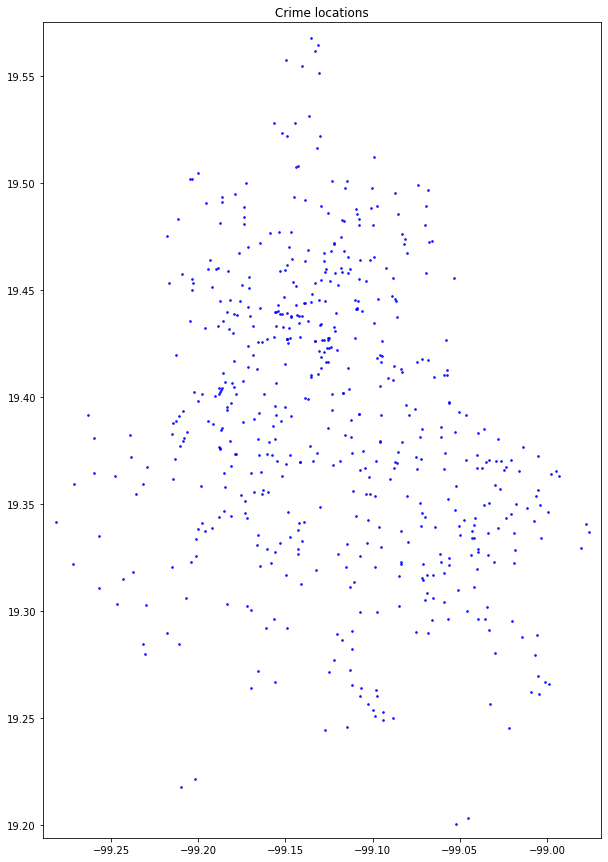

In [909]:
fig, ax = plt.subplots(figsize = (10,15))
plt.imread
ax.scatter(crime_geopoints.lon, crime_geopoints.lat, zorder=1, alpha= 0.8, c='b', s=3)
ax.set_title('Crime locations')
ax.set_xlim(bounds[2],bounds[3])
ax.set_ylim(bounds[0],bounds[1])

In [910]:
n_cam = 40
cam_loc = np.array([np.random.uniform(bounds[0],bounds[1],n_cam), np.random.uniform(bounds[2],bounds[3],n_cam)]).reshape(2*n_cam)
print(cam_loc)

[ 19.4531985   19.39457043  19.54529783  19.29397035  19.47322741
  19.41191498  19.45211119  19.2249696   19.22221302  19.40729398
  19.24353988  19.57429939  19.33160042  19.42435185  19.38826918
  19.36894994  19.38617347  19.34999429  19.56302109  19.26190681
  19.38005552  19.2276558   19.45317657  19.32061273  19.30444234
  19.51499784  19.30955065  19.23322141  19.27958951  19.34693998
  19.28219549  19.33159889  19.43692025  19.45730893  19.25655923
  19.56846853  19.50589304  19.47801139  19.19458943  19.48501625
 -99.05744542 -99.10420756 -99.17294566 -99.26730619 -99.20667782
 -99.05608605 -99.004576   -99.13698616 -99.08673492 -99.08862907
 -99.22281918 -98.97390294 -99.2003235  -99.06385493 -99.2242258
 -99.03981638 -99.1074295  -99.13652206 -99.04778993 -99.17629871
 -99.08817081 -99.03092231 -99.25534091 -99.2181528  -98.98976966
 -99.18994278 -99.17461681 -99.18752049 -99.15013646 -99.18016791
 -99.05207282 -98.99133201 -99.10209342 -99.22674257 -99.18180003
 -99.129182

In [911]:
crime_data_aux = crime_data 
crime_data_aux = crime_data_aux[np.logical_not(np.isnan(crime_data_aux))]
cam_loc_aux = cam_loc

In [912]:
def fcosto(camara_loc):
    #camara_loc = camara_loc.reshape((10,2))
    #print(camara_loc)
    n1 = n_cam
    n2 = int(len(crime_data_aux)/2)
    costo = 0
    flag = False
    for i in range(n1):
        for j in range(n2):
            costo += math.sqrt((camara_loc[i]-crime_data_aux[j])**2 + (camara_loc[n1+i]-crime_data_aux[n2+j])**2)
            # if (math.isnan(aux1) and flag == False) or (math.isnan(aux2) and flag==False):
            #     print(aux1)
            #     print(aux2)
            #     print(n1+i)
            #     print(crime_data_aux[n2+j])

            #     print(i)
            #     print(j)
            #     flag = True
            

                
        for k in range(n1):
            if i!=k:
                costo += 1/math.sqrt((camara_loc[i]-camara_loc[k])**2+(camara_loc[i+n1]-camara_loc[k+n1])**2)/3
    return costo




In [913]:
print(fcosto(cam_loc_aux))

7765.560515984004


In [914]:
print(cam_loc_aux)
print(crime_data_aux)
print(len(crime_data_aux))
print(np.count_nonzero(np.isnan(crime_data_aux)))


[ 19.4531985   19.39457043  19.54529783  19.29397035  19.47322741
  19.41191498  19.45211119  19.2249696   19.22221302  19.40729398
  19.24353988  19.57429939  19.33160042  19.42435185  19.38826918
  19.36894994  19.38617347  19.34999429  19.56302109  19.26190681
  19.38005552  19.2276558   19.45317657  19.32061273  19.30444234
  19.51499784  19.30955065  19.23322141  19.27958951  19.34693998
  19.28219549  19.33159889  19.43692025  19.45730893  19.25655923
  19.56846853  19.50589304  19.47801139  19.19458943  19.48501625
 -99.05744542 -99.10420756 -99.17294566 -99.26730619 -99.20667782
 -99.05608605 -99.004576   -99.13698616 -99.08673492 -99.08862907
 -99.22281918 -98.97390294 -99.2003235  -99.06385493 -99.2242258
 -99.03981638 -99.1074295  -99.13652206 -99.04778993 -99.17629871
 -99.08817081 -99.03092231 -99.25534091 -99.2181528  -98.98976966
 -99.18994278 -99.17461681 -99.18752049 -99.15013646 -99.18016791
 -99.05207282 -98.99133201 -99.10209342 -99.22674257 -99.18180003
 -99.129182

In [915]:
crime_data = np.array(crime_geopoints).reshape(2*n_crime)

In [856]:
optimal_loc = optimize.minimize(fcosto, cam_loc_aux, method = 'BFGS', tol= 10e-2)

In [857]:
print(optimal_loc.x)
print(optimal_loc)

[ 19.27257433  19.28641438  19.3444557   19.35525839  19.44469818
  19.35285743  19.39514704  19.51001637  19.3857284   19.31446771
  19.4305153   19.48730243  19.46071986  19.41175043 -99.14764053
 -99.06840625 -99.15097693 -99.01927591 -99.14951816 -99.08865199
 -99.18156135 -99.15989234 -99.24956683 -99.21863611 -99.0362903
 -99.08551836 -99.22038448 -99.10382403]
      fun: 1516.1999206578953
 hess_inv: array([[ 3.89153754e-04, -3.67289928e-04,  3.72296403e-04,
        -1.47570222e-04, -1.17155415e-04, -4.88857237e-04,
         3.34396583e-04, -7.92458134e-05,  2.81162428e-04,
         2.01060664e-04, -6.82775857e-05, -3.33328233e-05,
         2.65820580e-04, -3.11896240e-04, -2.83665166e-04,
        -1.22093954e-04, -2.74979352e-04, -1.56657009e-04,
         4.55106649e-04, -1.62465130e-04, -1.58885909e-04,
         1.83846568e-04, -1.22938084e-04, -2.21322237e-04,
         2.00495127e-04,  1.28079872e-04,  2.80608091e-04,
         3.66041067e-04],
       [-3.67289928e-04,  8.8057

In [858]:
optimal_loc = np.array(optimal_loc.x).reshape((2,n_cam))


(19.126, 19.568)

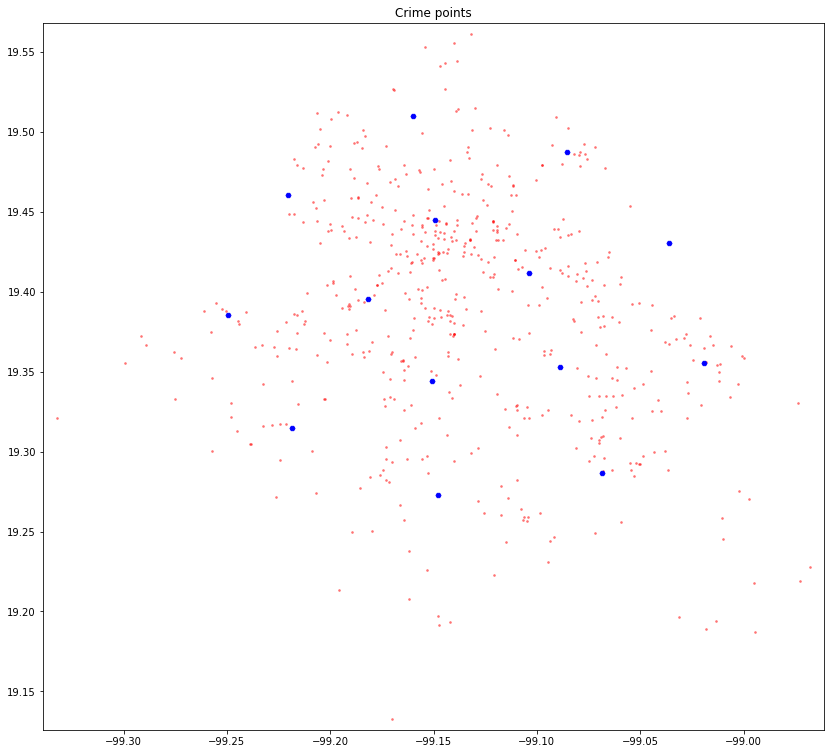

In [900]:
fig, ax = plt.subplots(figsize = (14,13))
ax.scatter(crime_geopoints.lon, crime_geopoints.lat, zorder=1, alpha= 0.4, c='r', s=3, label = 'Crimes')
ax.scatter(optimal_loc[1],optimal_loc[0], zorder = 2, alpha = 1, c = 'b', s = 25, marker = 'H', label = 'Camaras')
ax.set_title('Crime points')
ax.set_xlim(bounds[2],bounds[3])
ax.set_ylim(bounds[0],bounds[1])


In [861]:
print(optimal_loc[1])
print(optimal_loc[0])

[-99.14764053 -99.06840625 -99.15097693 -99.01927591 -99.14951816
 -99.08865199 -99.18156135 -99.15989234 -99.24956683 -99.21863611
 -99.0362903  -99.08551836 -99.22038448 -99.10382403]
[19.27257433 19.28641438 19.3444557  19.35525839 19.44469818 19.35285743
 19.39514704 19.51001637 19.3857284  19.31446771 19.4305153  19.48730243
 19.46071986 19.41175043]
